# 04 - Features

*KI-basierte Datenanalyse*, HFT Stuttgart, 2024 Summer Term, Michael Mommert (michael.mommert@hft-stuttgart.de)

In this Notebook, we will interactively explore ways to extract features from different data types.


In Binder, we first have to install the required packages:

In [1]:
!pip install -r requirements.txt

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/4b/d7/ecf66c1cd12dc28b4040b15ab4d17b773b87fa9d29ca16125de01adb36cd/numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/89/1b/12521efcbc6058e2673583bb096c2b5046a9df39bd73eca392c1efed24e5/pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d6/07/061f97211f942101070a46fecd813a6b1bd83590ed7b07c473cabd707fe7/matplotlib-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/b5/a2/7a09695dc636bf8d0a1b63022f58701177b7dc6fad30f6d6bc343e5473a4/pillow-10.3.0-cp310-cp310-manylinux_2_

We import the Pandas, NumPy and Matplotlib packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Quantitative Data

Consider the following DataFrame. Create a new DataFrame that contains the temperature in units of Kelvin and the rain amount in units of inches.

In [3]:
df = pd.DataFrame({
    'temp_C': [-0.3, 0.4, 3.9, 7.4, 12.0, 15.0, 17.2, 16.8, 13.1, 9.1, 3.7, 0.8],
    'rain_mm': [59, 57, 84, 100, 143, 153, 172, 164, 135, 89, 88, 80]},
    index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
           'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
df

,temp_C,rain_mm
jan,-0.3,59
feb,0.4,57
mar,3.9,84
apr,7.4,100
may,12.0,143
jun,15.0,153
jul,17.2,172
aug,16.8,164
sep,13.1,135
oct,9.1,89


In [7]:
temp_K = df.temp_C + 273.16
temp_K


jan    272.86
feb    273.56
mar    277.06
apr    280.56
may    285.16
jun    288.16
jul    290.36
aug    289.96
sep    286.26
oct    282.26
nov    276.86
dec    273.96
Name: temp_C, dtype: float64

In [8]:
rain_in = df.rain_mm / 25.4
rain_in

jan    2.322835
feb    2.244094
mar    3.307087
apr    3.937008
may    5.629921
jun    6.023622
jul    6.771654
aug    6.456693
sep    5.314961
oct    3.503937
nov    3.464567
dec    3.149606
Name: rain_mm, dtype: float64

In [12]:
df2 = pd.DataFrame({
    'temp_K': temp_K,
    'rain_in': rain_in})
df2

,temp_K,rain_in
jan,272.86,2.322835
feb,273.56,2.244094
mar,277.06,3.307087
apr,280.56,3.937008
may,285.16,5.629921
jun,288.16,6.023622
jul,290.36,6.771654
aug,289.96,6.456693
sep,286.26,5.314961
oct,282.26,3.503937


## Qualitative Data

Read in the names of Titanic passengers. From the name list, extrapolate the sex of each passenger.

In [13]:
df = pd.read_csv('titanic_names.csv')
df

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [24]:
titles = []

for n in df.Name:
    titles.append(n.split(',')[1].split('.')[0])

In [26]:
set(titles)

{' Capt',
 ' Col',
 ' Don',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir',
 ' the Countess'}

In [29]:
d = {' Capt': 'm',
     ' Col': 'm',
     ' Don': 'm',
     ' Dr': 'm',
     ' Jonkheer': 'm',
     ' Lady': 'f',
     ' Major': 'm',
     ' Master': 'm',
     ' Miss': 'f',
     ' Mlle': 'f',
     ' Mme': 'f',
     ' Mr': 'm',
     ' Mrs': 'f',
     ' Ms': 'f',
     ' Rev': 'm',
     ' Sir': 'm',
     ' the Countess': 'f'}

s = []

for t in titles:
    s.append(d[t])

In [30]:
df.loc[:, 'Sex'] = s
df

,Name,Sex
0,"Braund, Mr. Owen Harris",m
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f
2,"Heikkinen, Miss. Laina",f
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f
4,"Allen, Mr. William Henry",m
...,...,...
886,"Montvila, Rev. Juozas",m
887,"Graham, Miss. Margaret Edith",f
888,"Johnston, Miss. Catherine Helen ""Carrie""",f
889,"Behr, Mr. Karl Howell",m


In [38]:
pd.set_option('display.max_rows', 10)

df.loc[df.Sex == 'm', 'Sex'] = 0
df.loc[df.Sex == 'f', 'Sex'] = 1
df

,Name,Sex
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",1
889,"Behr, Mr. Karl Howell",0


## Image Data

Consider the following image and extract different image features:

* channel histograms
* Histogram of oriented Gradients
* Canny Edges

In [42]:
from PIL import Image

img = np.array(Image.open('IMG_20230622_085147.jpg').convert('RGB'))
img

array([[[233, 238, 242],
        [233, 238, 242],
        [233, 238, 242],
        ...,
        [122, 126, 129],
        [121, 125, 128],
        [119, 123, 126]],

       [[232, 237, 241],
        [233, 238, 242],
        [233, 238, 242],
        ...,
        [123, 127, 130],
        [122, 126, 129],
        [120, 124, 127]],

       [[232, 237, 241],
        [232, 237, 241],
        [233, 238, 242],
        ...,
        [122, 126, 129],
        [120, 124, 127],
        [119, 123, 126]],

       ...,

       [[108, 107,  42],
        [107, 106,  41],
        [ 95,  94,  29],
        ...,
        [ 63,  56,  63],
        [ 62,  56,  60],
        [ 62,  56,  60]],

       [[ 99,  95,  31],
        [ 96,  95,  30],
        [ 87,  86,  21],
        ...,
        [ 68,  61,  68],
        [ 63,  56,  63],
        [ 61,  54,  61]],

       [[ 87,  83,  19],
        [ 85,  81,  17],
        [ 80,  79,  14],
        ...,
        [ 65,  58,  65],
        [ 61,  54,  61],
        [ 60,  53,  60]]

### Channel Histograms

In [43]:
img.shape

(2400, 3200, 3)

In [49]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

In [60]:
r_hist, bins = np.histogram(r, bins=120)
g_hist, bins = np.histogram(g, bins=120)
b_hist, bins = np.histogram(b, bins=120)

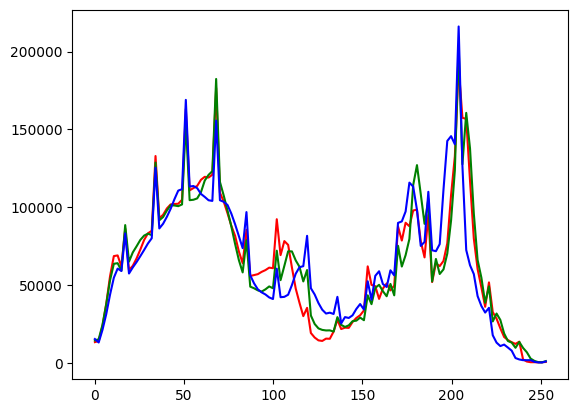

In [61]:
plt.plot(bins[:-1], r_hist, color='red')
plt.plot(bins[:-1], g_hist, color='green')
plt.plot(bins[:-1], b_hist, color='blue')

In [64]:
feature = np.ravel((r_hist, g_hist, b_hist))
feature.shape

(360,)

### Canny Edges

In [97]:
from skimage.feature import canny

c = canny(g, low_threshold=50, high_threshold=100) # threshold Skala: 0 ... 255

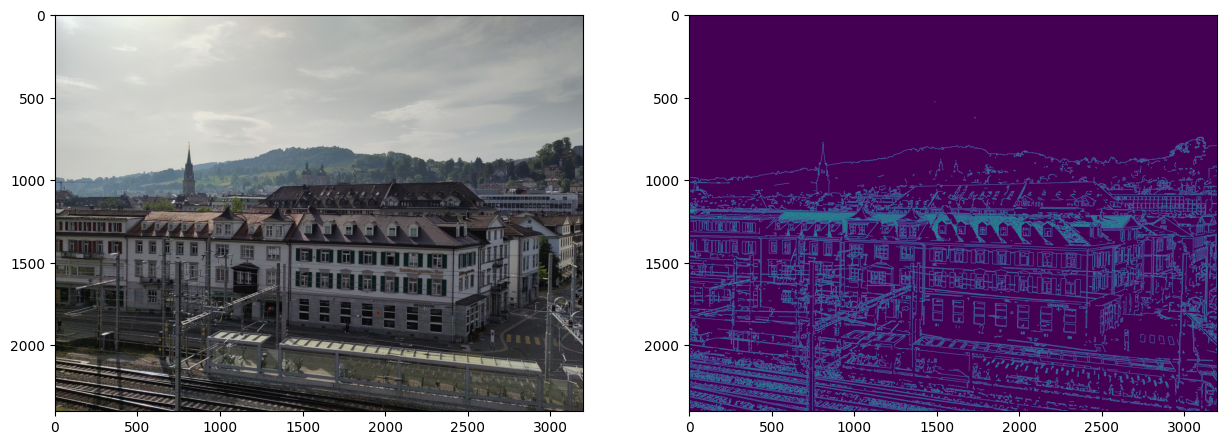

In [98]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].imshow(img)
ax[1].imshow(c)

### Histogram of Oriented Gradients

In [94]:
from skimage.feature import hog
from skimage import exposure

fd, h = hog(g, visualize=True)

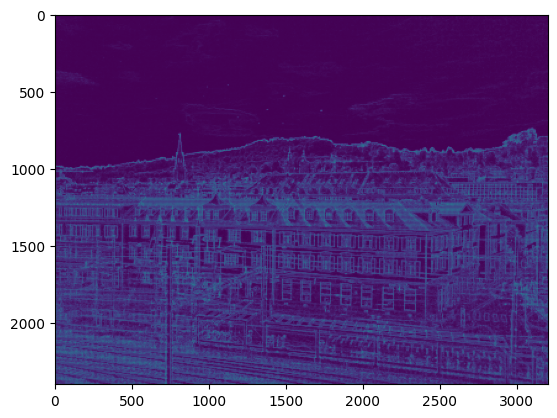

In [96]:
plt.imshow(exposure.rescale_intensity(h, in_range=(0, 10)))

## Text Data

Read in the first chapter of Frankenstein and experiment with the following techniques:

* tokenization
* bag-of-words
* lemmatization
* n-grams

In [109]:
with open("frankenstein_chapter1.txt", "r") as f:
    data = f.readlines()

text = ""
for line in data:
    text += line.replace('\n', ' ')
text

'I am by birth a Genevese, and my family is one of the most distinguished of that republic. My ancestors had been for many years counsellors and syndics, and my father had filled several public situations with honour and reputation. He was respected by all who knew him for his integrity and indefatigable attention to public business. He passed his younger days perpetually occupied by the affairs of his country; a variety of circumstances had prevented his marrying early, nor was it until the decline of life that he became a husband and the father of a family.  As the circumstances of his marriage illustrate his character, I cannot refrain from relating them. One of his most intimate friends was a merchant who, from a flourishing state, fell, through numerous mischances, into poverty. This man, whose name was Beaufort, was of a proud and unbending disposition and could not bear to live in poverty and oblivion in the same country where he had formerly been distinguished for his rank and 

In [112]:
import nltk
nltk.download('punkt')

tokens = nltk.word_tokenize(text)
tokens

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I',
 'am',
 'by',
 'birth',
 'a',
 'Genevese',
 ',',
 'and',
 'my',
 'family',
 'is',
 'one',
 'of',
 'the',
 'most',
 'distinguished',
 'of',
 'that',
 'republic',
 '.',
 'My',
 'ancestors',
 'had',
 'been',
 'for',
 'many',
 'years',
 'counsellors',
 'and',
 'syndics',
 ',',
 'and',
 'my',
 'father',
 'had',
 'filled',
 'several',
 'public',
 'situations',
 'with',
 'honour',
 'and',
 'reputation',
 '.',
 'He',
 'was',
 'respected',
 'by',
 'all',
 'who',
 'knew',
 'him',
 'for',
 'his',
 'integrity',
 'and',
 'indefatigable',
 'attention',
 'to',
 'public',
 'business',
 '.',
 'He',
 'passed',
 'his',
 'younger',
 'days',
 'perpetually',
 'occupied',
 'by',
 'the',
 'affairs',
 'of',
 'his',
 'country',
 ';',
 'a',
 'variety',
 'of',
 'circumstances',
 'had',
 'prevented',
 'his',
 'marrying',
 'early',
 ',',
 'nor',
 'was',
 'it',
 'until',
 'the',
 'decline',
 'of',
 'life',
 'that',
 'he',
 'became',
 'a',
 'husband',
 'and',
 'the',
 'father',
 'of',
 'a',
 'family',
 '.',
 'A

In [114]:
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [115]:
tagged

[('I', 'PRP'),
 ('am', 'VBP'),
 ('by', 'IN'),
 ('birth', 'NN'),
 ('a', 'DT'),
 ('Genevese', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('family', 'NN'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('distinguished', 'JJ'),
 ('of', 'IN'),
 ('that', 'DT'),
 ('republic', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('ancestors', 'NNS'),
 ('had', 'VBD'),
 ('been', 'VBN'),
 ('for', 'IN'),
 ('many', 'JJ'),
 ('years', 'NNS'),
 ('counsellors', 'NNS'),
 ('and', 'CC'),
 ('syndics', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('father', 'NN'),
 ('had', 'VBD'),
 ('filled', 'VBN'),
 ('several', 'JJ'),
 ('public', 'JJ'),
 ('situations', 'NNS'),
 ('with', 'IN'),
 ('honour', 'NN'),
 ('and', 'CC'),
 ('reputation', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('was', 'VBD'),
 ('respected', 'VBN'),
 ('by', 'IN'),
 ('all', 'DT'),
 ('who', 'WP'),
 ('knew', 'VBD'),
 ('him', 'PRP'),
 ('for', 'IN'),
 ('his', 'PRP$'),
 ('integrity', 'NN'),
 ('and', 'CC'),
 ('indefat

In [123]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

for w in tokens[:100]:
    print(w, stemmer.stem(w))

I i
am am
by by
birth birth
a a
Genevese geneves
, ,
and and
my my
family famili
is is
one one
of of
the the
most most
distinguished distinguish
of of
that that
republic republ
. .
My my
ancestors ancestor
had had
been been
for for
many mani
years year
counsellors counsellor
and and
syndics syndic
, ,
and and
my my
father father
had had
filled fill
several sever
public public
situations situat
with with
honour honour
and and
reputation reput
. .
He he
was wa
respected respect
by by
all all
who who
knew knew
him him
for for
his hi
integrity integr
and and
indefatigable indefatig
attention attent
to to
public public
business busi
. .
He he
passed pass
his hi
younger younger
days day
perpetually perpetu
occupied occupi
by by
the the
affairs affair
of of
his hi
country countri
; ;
a a
variety varieti
of of
circumstances circumst
had had
prevented prevent
his hi
marrying marri
early earli
, ,
nor nor
was wa
it it
until until
the the
decline declin
of of
life life
that that
he he
became beca